# Palm Tree Detection

This project was intended to detect and count palm tree image with top-down view using YOLOv8 Architecture.
I used YOLOv8 architecture because of its ability that are proven in the industry with well-documented project. YOLOv8 developed by Ulralytics also have good integration API to pytorch which can easly be deployed to a released product

## Environment Setup

I am using conda 24.11.3 with Linux Mint 21.1 system.
Before continuing the process I would like to setting up the environment with conda. Make suere you have already install the miniconda or anaconda in your machine. By following this step you will creating project environment:
1. create project folder
    
    ```bash
    mkdir palm-tree-detection-with-yolov8
    ```
2. Go to the folder
    
    ```bash
    cd mkdir palm-tree-detection-with-yolov8
    ```
3. Create conda environment in normal way

    ```bash
    conda create --name palm-tree-detection-with-yolov8 python=3.11 -y
    ```
    Due to my Linux's storage limit, I would like to make my conda env specific in my project folder. This line will create a hiden folder for the env
   
    ```bash
        conda create --prefix=.conda-palm-tree-detection-with-yolov8 python=3.11 -y
    ```

4. after finish creating, activate the environment

    ```bash
    conda activate palm-tree-detection-with-yolov8
    ```
    Or if you are using Vscode:
    <br>install this
    ```bash
    pip install ipykernel
    ```

    and select the kernel from there.
    
5. Install the Ultralytics library with CUDA
    ```bash
    conda install -c pytorch -c nvidia -c conda-forge pytorch torchvision pytorch-cuda=11.8 ultralytics
    ```
6. Move this ipynb file to the project folder


## Data Gathering

The data I used in this project was originally from https://universe.roboflow.com/cryospace-yylkk/palm-tree-label-200m-splitted and its already labled

1. In the project folder ```palm-tree-detection-with-yolov8```, create dataset folder
    ```bash
    mkdir dataset
    ```
2. Download the dataset
 
    ```bash
    !curl -L "https://universe.roboflow.com/ds/JVKquPWr8c?key=xC8w7Rxzla" > roboflow.zip;
    ```
3. Extract the data into ```dataset``` folder and make sure it looks like this:
```bash
    dataset/
    ├── train/
    │   ├── images/
    │   ├── labels/
    ├── valid/
    │   ├── images/
    │   ├── labels/
    ├── test/
    │   ├── images/
    │   ├── labels/
    └── data.yaml
```

# Librareis setup

In [2]:
#checking Python versions
!python --version

Python 3.11.11


In [1]:
from ultralytics import YOLO
import torch
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [24]:
import pandas as pd

In [2]:
#checking the model
print(YOLO('yolov8n.pt'))

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce GTX 1650


In [11]:
!cat dataset/data.yaml

train: train/images
val: valid/images
test: test/images

names: 
  0: Palm-Tree


## Training

In [12]:
absolute_path = os.getcwd()

In [13]:
data = f'{absolute_path}/dataset/data.yaml'
data

'/media/dartoyo/SSD2P2/programming/python/palm-tree-detection/dataset/data.yaml'

In [14]:
model = YOLO('yolov8n.pt')
# Train the model
model.train(data=data, 
            epochs=10, 
            imgsz=640, 
            batch=9,
            device=0)


New https://pypi.org/project/ultralytics/8.3.61 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.59 🚀 Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/media/dartoyo/SSD2P2/programming/python/palm-tree-detection/dataset/data.yaml, epochs=10, time=None, patience=100, batch=9, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

train: Scanning /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/dataset/train/labels.cache... 1902 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1902/1902 [00:00<?, ?it/s]
val: Scanning /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/dataset/valid/labels.cache... 219 images, 0 backgrounds, 0 corrupt: 100%|██████████| 219/219 [00:00<?, ?it/s]


Plotting labels to /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004921875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train19
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.01G      1.696      1.351      1.485        274        640: 100%|██████████| 212/212 [00:58<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]


                   all        219      19666      0.906      0.965      0.958      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.58G      1.383     0.7266      1.264        152        640: 100%|██████████| 212/212 [00:56<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]

                   all        219      19666      0.891      0.933      0.956      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.62G      1.315     0.6566      1.227        226        640: 100%|██████████| 212/212 [00:57<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]

                   all        219      19666      0.872      0.905      0.939      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         3G      1.279     0.6114        1.2        328        640: 100%|██████████| 212/212 [00:57<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.59it/s]

                   all        219      19666      0.896      0.928      0.961      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.84G      1.242     0.5811      1.178        174        640: 100%|██████████| 212/212 [00:56<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.01it/s]

                   all        219      19666      0.919      0.957      0.976      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.89G      1.212     0.5538      1.163        154        640: 100%|██████████| 212/212 [00:55<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.88it/s]

                   all        219      19666      0.913      0.948      0.973      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.59G      1.188      0.536      1.149        169        640: 100%|██████████| 212/212 [00:55<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.91it/s]

                   all        219      19666      0.917      0.954      0.977      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.99G       1.14     0.5176      1.128        371        640: 100%|██████████| 212/212 [00:56<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]

                   all        219      19666      0.935      0.962      0.983      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.61G      1.126     0.5058      1.125        221        640: 100%|██████████| 212/212 [00:56<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]

                   all        219      19666      0.931      0.968      0.983      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.64G      1.105     0.4899      1.117        270        640: 100%|██████████| 212/212 [00:57<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.14it/s]

                   all        219      19666      0.932      0.965      0.983       0.67



10 epochs completed in 0.170 hours.
Optimizer stripped from /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train19/weights/last.pt, 6.2MB
Optimizer stripped from /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train19/weights/best.pt, 6.2MB

Validating /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train19/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]


                   all        219      19666      0.935      0.962      0.983      0.709
Speed: 0.3ms preprocess, 6.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train19


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7300e66510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Counting palm trees in image sample and Evaluation

In [37]:
#reading the test image
img_source = f"{absolute_path}/dataset/palm-tree.jpeg"

In [16]:
sample_palm_tree = model(source=img_source, save=True, save_txt=True)


image 1/1 /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/dataset/palm-tree.jpeg: 640x576 300 Palm-Trees, 24.3ms
Speed: 4.9ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)
Results saved to /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train192
1 label saved to /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train192/labels


In [17]:
# Extract detection results
boxes = sample_palm_tree[0].boxes.xyxy
confidences = sample_palm_tree[0].boxes.conf
classes = sample_palm_tree[0].boxes.cls
names = sample_palm_tree[0].names


In [18]:
palm_tree_image = cv2.imread(img_source)

In [19]:
#changin the box
for i, box in enumerate(boxes):
    # Extract box coordinates and convert to integers
    x_min, y_min, x_max, y_max = map(int, box)

    confidence = confidences[i]
    color = (252, 115, 3)

    # Draw the bounding box
    cv2.rectangle(palm_tree_image, (x_min, y_min), (x_max, y_max), color, thickness=6)

    # label text
    label = f"confidence:{confidence:.2f}"

    # Get the text size for positioning
    label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
    label_y_min = max(y_min, label_size[1] + 10)  # Ensure label doesn't go outside the image

    # Draw the label background
    cv2.rectangle(palm_tree_image, (x_min, y_min - label_size[1] - 10), (x_min + label_size[0], y_min), color, -1)

    # Put the label on the image
    cv2.putText(palm_tree_image, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), thickness=1)


In [20]:
im_out_path = f'{absolute_path}/runs/detect/palm_tree_sample/new_palm_tree4.jpg'
cv2.imwrite(im_out_path, palm_tree_image)


True

### image result

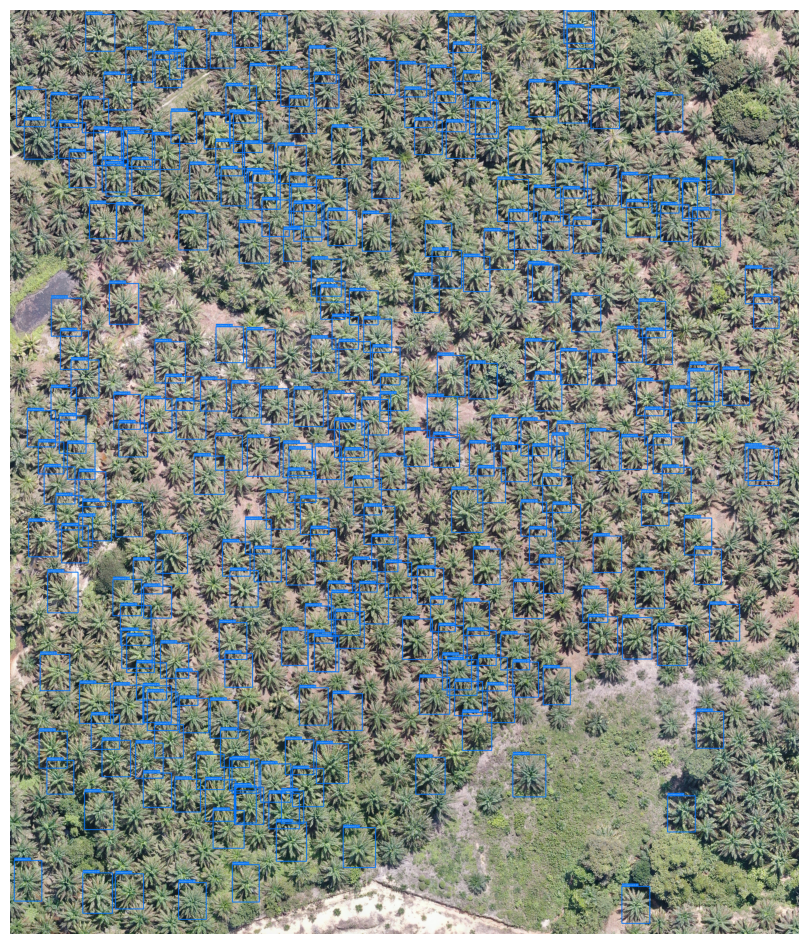

In [21]:
img = mpimg.imread(f'{absolute_path}/runs/detect/palm_tree_sample/new_palm_tree4.jpg')
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
print(f"Palm tree detected: {len(sample_palm_tree[0].boxes)}")

Palm tree detected: 300


In [23]:
model_result = model.val()

Ultralytics 8.3.59 🚀 Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)


val: Scanning /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/dataset/valid/labels.cache... 219 images, 0 backgrounds, 0 corrupt: 100%|██████████| 219/219 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.33it/s]


                   all        219      19666      0.935      0.962      0.983      0.709
Speed: 0.4ms preprocess, 7.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train193


In [25]:
result_csv = pd.read_csv(f'{absolute_path}/runs/detect/train19/results.csv')
result_csv

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,63.726,1.69595,1.35065,1.48464,0.90585,0.96525,0.95816,0.54902,1.56338,0.75972,1.34550,0.000664,0.000664,0.000664
1,2,126.093,1.38285,0.72658,1.26374,0.89091,0.93318,0.95573,0.54934,1.43979,0.79181,1.28623,0.001198,0.001198,0.001198
2,3,187.902,1.31522,0.65664,1.22689,0.87225,0.90477,0.93901,0.48560,1.69923,0.78475,1.40484,0.001601,0.001601,0.001601
3,4,249.354,1.27946,0.61142,1.20004,0.89602,0.92769,0.96112,0.53306,1.66727,0.69457,1.42666,0.001406,0.001406,0.001406
4,5,309.328,1.24175,0.58110,1.17801,0.91875,0.95679,0.97646,0.65441,1.23170,0.55159,1.17834,0.001208,0.001208,0.001208
5,6,369.394,1.21161,0.55382,1.16274,0.91267,0.94802,0.97319,0.56805,1.46155,0.60462,1.29625,0.001010,0.001010,0.001010
6,7,429.318,1.18786,0.53601,1.14885,0.91742,0.95407,0.97719,0.56743,1.54654,0.57956,1.36478,0.000812,0.000812,0.000812
7,8,489.371,1.13981,0.51763,1.12800,0.93468,0.96191,0.98343,0.70859,1.08769,0.47303,1.11306,0.000614,0.000614,0.000614
8,9,550.324,1.12629,0.50585,1.12455,0.93122,0.96786,0.98257,0.69412,1.10513,0.46198,1.11837,0.000416,0.000416,0.000416
9,10,611.242,1.10453,0.48995,1.11691,0.93193,0.96451,0.98301,0.67009,1.22087,0.48118,1.17618,0.000218,0.000218,0.000218


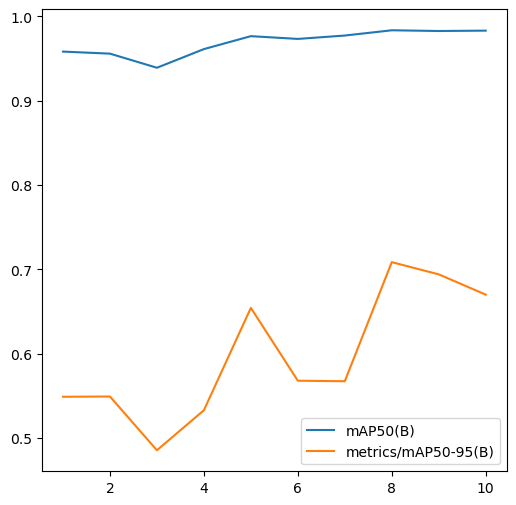

In [35]:
plt.figure(figsize=(6,6))
plt.plot(result_csv['epoch'], result_csv['metrics/mAP50(B)'], label='mAP50(B)')
plt.plot(result_csv['epoch'], result_csv['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
plt.legend()
plt.show()

In [83]:
#Exporting model

model.export(format="onnx") 

Ultralytics 8.3.59 🚀 Python-3.11.11 torch-2.5.1 CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)

PyTorch: starting from '/media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train16/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 2.4 MB/s eta 0:00:0000:0100:04

requirements: AutoUpdate success ✅ 150.9s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.47...
ONNX: export success ✅ 152.3s, saved as '/media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/tr

'/media/dartoyo/SSD2P2/programming/python/palm-tree-detection/runs/detect/train16/weights/best.onnx'

# Conclusion

While the model trained with only 10 epoch, it still can recognize tha palm trees, though there are still wide area containing with palm tree were not detected. As the ```sample_palm_tree``` boxes are counted, the total palm tree detected by the model is 300 and the mean Average Precision calculated across Intersection over Union (IoU) thresholds from 0.5 to 0.95 (mAP50-95) result with 70.85% of avarage precision. mAP50 seems flactuated in the higher value, it may indicating overfitting.

I recognize that there's always room for improvement. In future work, I would explore different YOLOv8 variants, optimize training parameters, and evaluate the model's robustness on a broader range of datasets. I am confident that with further refinement, this system can become an even more valuable tool for palm tree detection.

